# [IAPR][iapr]: Project


**Group ID:** xx

**Author 1 (sciper):** Ludovic Pujol (301033)  
**Author 2 (sciper):** Arthur André (287599)   
**Author 3 (sciper):** Octavio Profeta (301450)  

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [252]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from skimage import measure, transform, morphology
import cv2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

2023-05-31 13:47:46.369086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [253]:
def load_input_image(image_index ,  folder ="train" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)
        


***
# START - CRASH ZONE

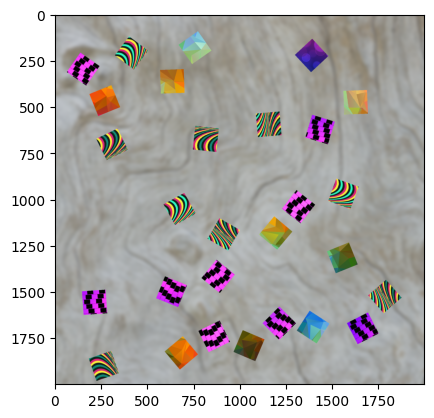

In [266]:
im = load_input_image(5)
plt.imshow(im)
plt.show()

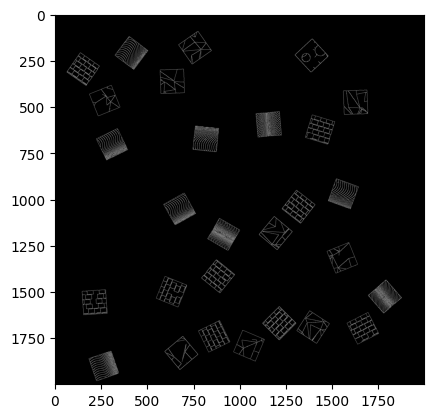

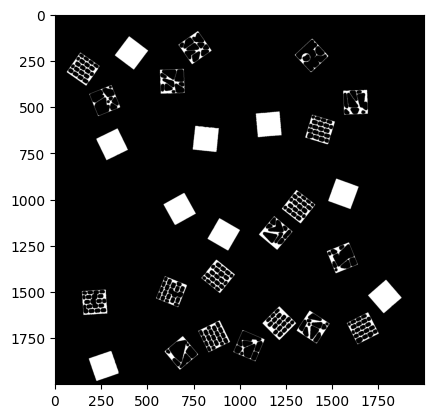

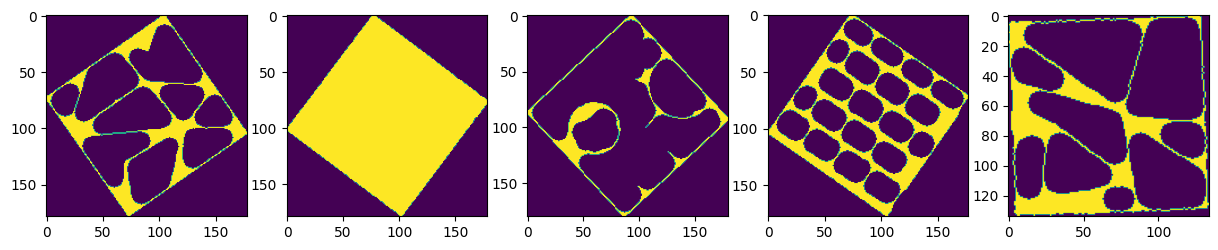

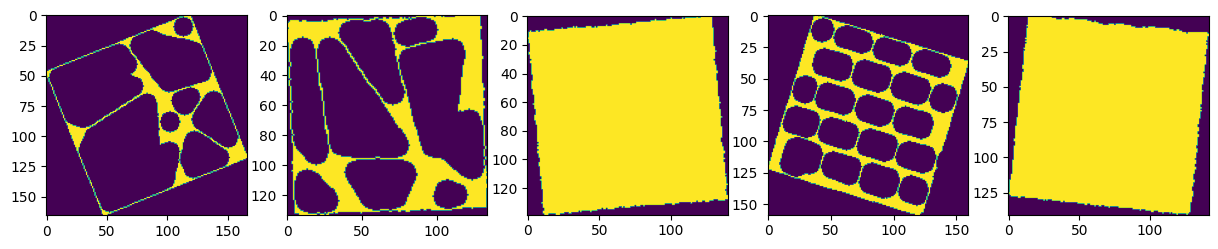

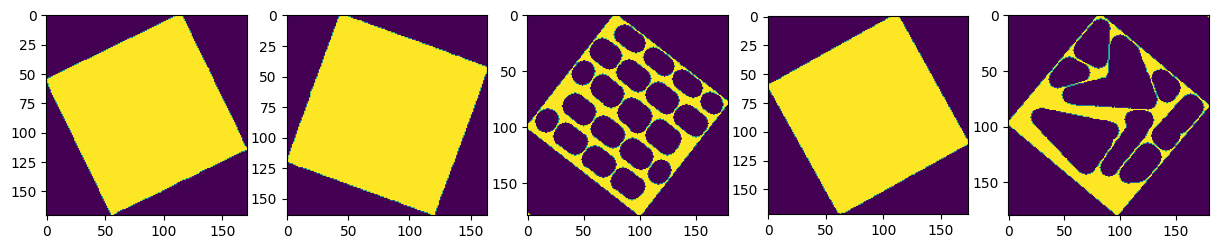

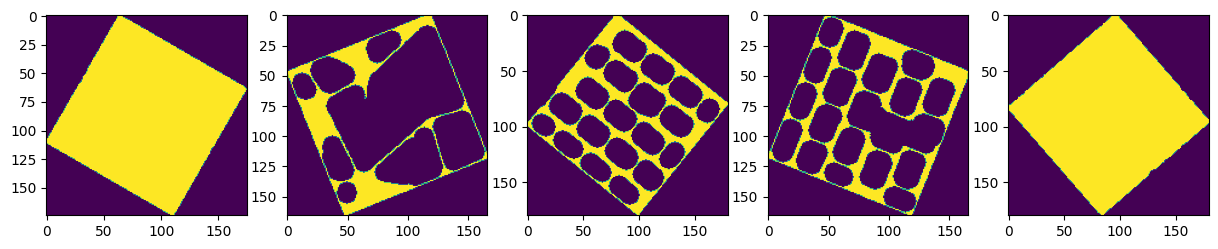

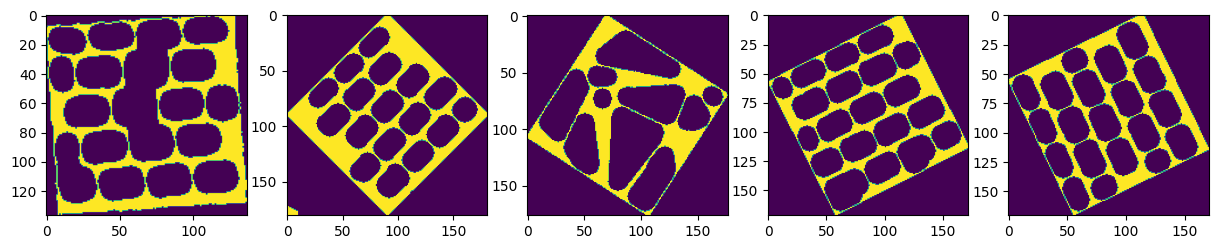

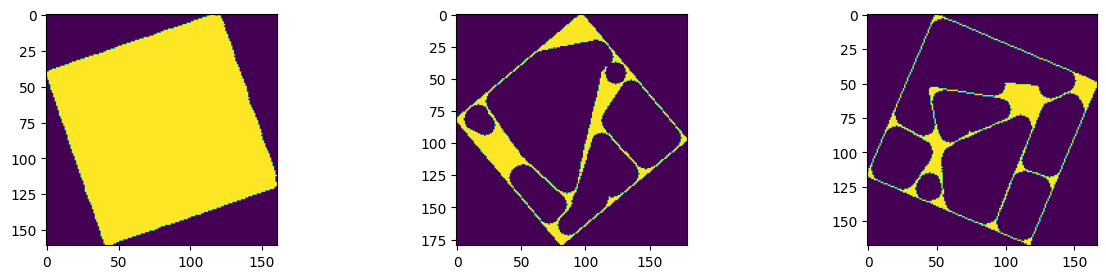

In [264]:
# 1. Load the image
im = load_input_image(5, folder = "train" , path = "data_project")
# plt.imshow(im)
# plt.show()

# 2. Detect edges using cv2.Canny
edges = cv2.Canny(im, 25, 250)

# Plot the edges
plt.imshow(edges, cmap='gray')
plt.show()

# 3. Morphological closing
edges = morphology.closing(edges, morphology.disk(8))

# Plot the edges
# plt.imshow(edges, cmap='gray')
# plt.show()

# Label the regions
label_image = measure.label(edges)
regions = measure.regionprops(label_image)

# Plot each region 
fig, ax = plt.subplots()
ax.imshow(edges, cmap='gray')

# Extraction des pièces de puzzle
puzzle_pieces_bin = []
puzzle_pieces = []
for region in regions:
    
    # Extraire la pièce de puzzle
    min_row, min_col, max_row, max_col = region.bbox
    
    # Exclure les régions de petite taille
    if max_row - min_row < 128 and max_col - min_col < 128: continue
    
    puzzle_piece_bin = edges[min_row:max_row, min_col:max_col]
    puzzle_pieces_bin.append(puzzle_piece_bin)
    puzzle_piece = im[min_row:max_row, min_col:max_col]
    puzzle_pieces.append(puzzle_piece)
    
# Plot les pièces de puzzle 5 par 5, plus le modulo
for i in range(int(len(puzzle_pieces_bin)/5)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    for j in range(5):
        ax[j].imshow(puzzle_pieces_bin[5*i+j])

if len(puzzle_pieces_bin)%5 != 0:
    fig, ax = plt.subplots(1, len(puzzle_pieces_bin)%5, figsize=(15, 3))
    for i in range(len(puzzle_pieces_bin)%5):
        if len(puzzle_pieces_bin)%5 == 1:
            ax.imshow(puzzle_pieces_bin[len(puzzle_pieces_bin)-i-1])
        else:
            ax[i].imshow(puzzle_pieces_bin[len(puzzle_pieces_bin)-i-1])
    plt.show()



Number of pieces: 28


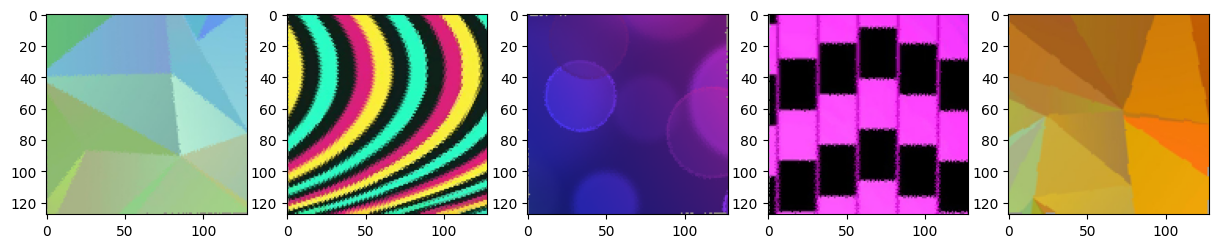

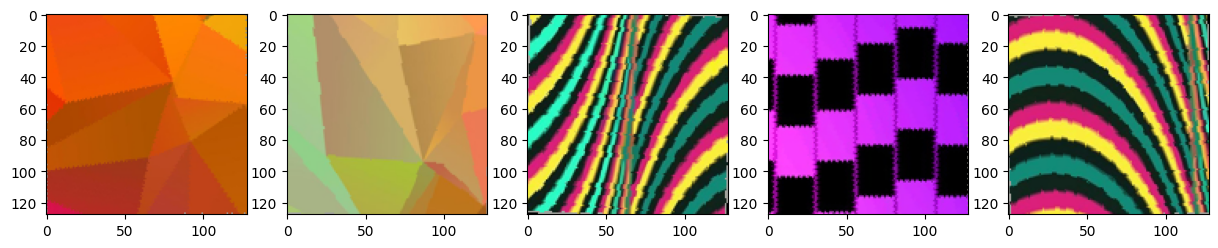

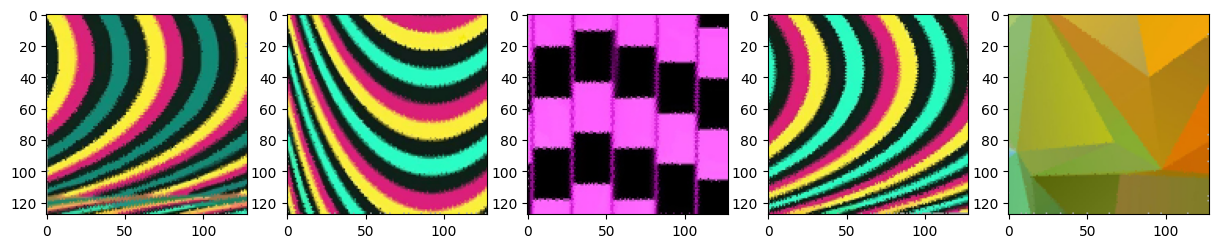

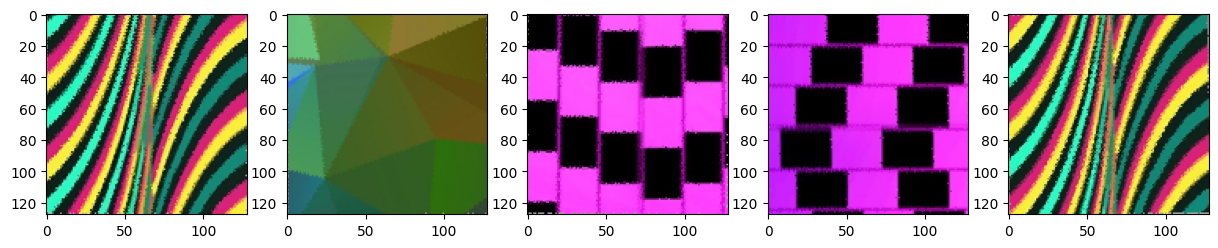

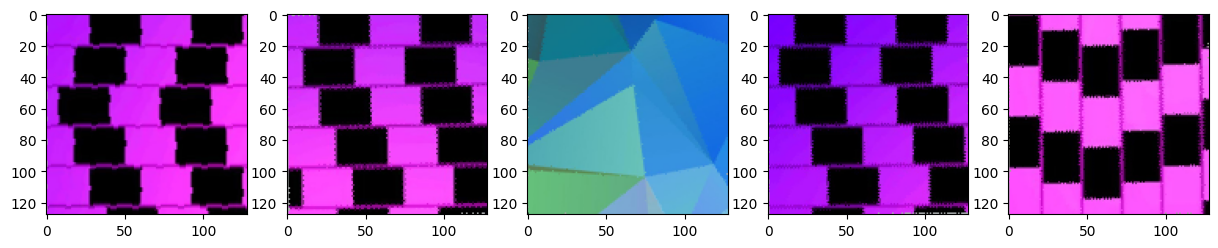

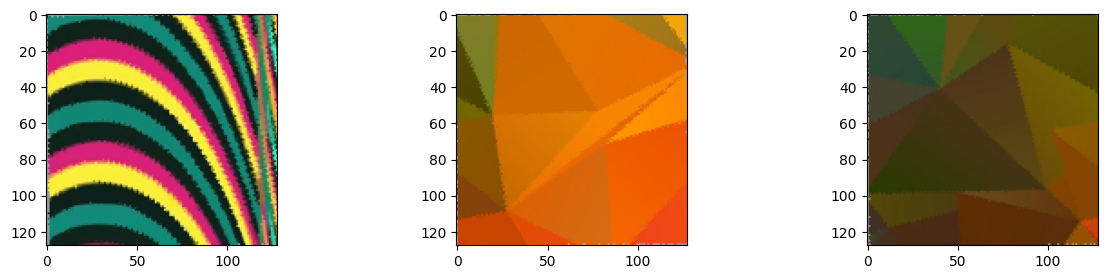

In [267]:
# Recherche du premier coin de chaque piece de puzzle
all_corners = []
for puzzle_piece_bin in puzzle_pieces_bin:
    corners = []
    for i in range(puzzle_piece_bin.shape[0]):
        if puzzle_piece_bin[i, 0] == 255:
            corners.append([i, 0])
    if corners == []:
        for i in range(puzzle_piece_bin.shape[0]):
            if puzzle_piece_bin[i, 1] == 255:
                corners.append([i, 1])
    all_corners.append(corners)

# Recherche du premier corner de chaque pièce de puzzle grâce à la distance entre chaque corner et le centre de la pièce
corners = []
for i, corner_list  in enumerate(all_corners):
    center = np.array([puzzle_pieces_bin[i].shape[0]/2, puzzle_pieces_bin[i].shape[1]/2])
    for point in corner_list[:]:
        dist = np.linalg.norm(point-center)
        if dist > np.sqrt(2)*64 + 2:
            corner_list.remove(point)
    subtracted = [element1 - element2 for (element1, element2) in zip(corner_list, [center]*len(corner_list))]
    distances = []
    for point in subtracted:
        distances.append(np.linalg.norm(point))
    corners.append(corner_list[(distances.index(max(distances)))])

# Rotate each puzzle piece to be upright
puzzle_pieces_upright = []
for i, puzzle_piece in enumerate(puzzle_pieces):
    # Calculate the vector from the center of the puzzle piece to the corner
    vector = corners[i] - np.array([[puzzle_piece.shape[0] / 2, puzzle_piece.shape[1] / 2]])
    # Calculate the angle of rotation
    angle = np.arctan2(vector[0, 0], vector[0, 1]) * 180 / np.pi + 135
    # Rotate the puzzle piece
    puzzle_piece_upright = transform.rotate(puzzle_piece, angle, order=0)
    puzzle_pieces_upright.append(puzzle_piece_upright)

# Crop the puzzle pieces to be 128x128
puzzle_pieces_upright_cropped = []
for puzzle_piece_upright in puzzle_pieces_upright:
    puzzle_piece_upright_cropped = puzzle_piece_upright[puzzle_piece_upright.shape[0] // 2 - 64:puzzle_piece_upright.shape[0] // 2 + 64, puzzle_piece_upright.shape[1] // 2 - 64:puzzle_piece_upright.shape[1] // 2 + 64, :]
    puzzle_pieces_upright_cropped.append(puzzle_piece_upright_cropped)
    

# Print the number of pieces
n_pieces = len(puzzle_pieces_upright_cropped)
print("Number of pieces: {}".format(n_pieces))

# Plot the pieces 5 at a time, plus the remainder
for i in range(int(len(puzzle_pieces_upright_cropped)/5)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    for j in range(5):
        ax[j].imshow(puzzle_pieces_upright_cropped[5*i+j])

if len(puzzle_pieces_upright_cropped)%5 != 0:
    fig, ax = plt.subplots(1, len(puzzle_pieces_upright_cropped)%5, figsize=(15, 3))
    for i in range(len(puzzle_pieces_upright_cropped)%5):
        if len(puzzle_pieces_upright_cropped)%5 == 1:
            ax.imshow(puzzle_pieces_upright_cropped[len(puzzle_pieces_upright_cropped)-i-1])
        else:
            ax[i].imshow(puzzle_pieces_upright_cropped[len(puzzle_pieces_upright_cropped)-i-1])    
plt.show()

# -------------- A PARTIR D'ICI C'EST LE CODE AU PROPRE --------------

In [255]:
def get_puzzle_pieces(im, plot_pieces=False):
    # 2. Detect edges using cv2.Canny
    edges = cv2.Canny(im, 25, 250)

    # Plot the edges
    # plt.imshow(edges, cmap='gray')
    # plt.show()

    # 3. Morphological closing
    edges = morphology.closing(edges, morphology.disk(8))

    # Plot the edges
    # plt.imshow(edges, cmap='gray')
    # plt.show()

    # Label the regions
    label_image = measure.label(edges)
    regions = measure.regionprops(label_image)

    # Plot each region 
    # fig, ax = plt.subplots()
    # ax.imshow(edges, cmap='gray')

    # Extract each puzzle piece
    puzzle_pieces_bin = []
    puzzle_pieces = []
    for region in regions:
        
        # Extact the puzzle piece
        min_row, min_col, max_row, max_col = region.bbox
        
        # Exclude regions of small size
        if max_row - min_row < 128 and max_col - min_col < 128: continue
        
        # Focus the region to the to rotated puzzle piece
        puzzle_piece_bin = edges[min_row:max_row, min_col:max_col]
        puzzle_pieces_bin.append(puzzle_piece_bin)
        puzzle_piece = im[min_row:max_row, min_col:max_col]
        puzzle_pieces.append(puzzle_piece)

    # Look for a corner of each puzzle piece
    all_corners = []
    for puzzle_piece_bin in puzzle_pieces_bin:
        corners = []
        for i in range(puzzle_piece_bin.shape[0]): # Loop over the left side of the cropped image
            if puzzle_piece_bin[i, 0] == 255: # If the pixel is white, it is a potential corner
                corners.append([i, 0])
        if corners == []:                               # If no corners are found on the first column, look at the second column
            for i in range(puzzle_piece_bin.shape[0]):
                if puzzle_piece_bin[i, 1] == 255:
                    corners.append([i, 1])
        all_corners.append(corners)

    # Detect the acual corner of each puzzle piece using distance from poitn to center; a corner piece piece will approximately have a distance
    # of sqrt(2)*64 from the center
    corners = []
    for i, corner_list  in enumerate(all_corners):
        center = np.array([puzzle_pieces_bin[i].shape[0]/2, puzzle_pieces_bin[i].shape[1]/2]) # Center of the puzzle piece
        for point in corner_list[:]:
            dist = np.linalg.norm(point-center)
            if dist > np.sqrt(2)*64 + 2:
                corner_list.remove(point) # Remove points that are too far from the center to be a corner
        subtracted = [element1 - element2 for (element1, element2) in zip(corner_list, [center]*len(corner_list))]
        distances = []
        for point in subtracted:
            distances.append(np.linalg.norm(point))
        corners.append(corner_list[(distances.index(max(distances)))]) # If the image was incorrectly cropped, the point of the corner with the 
                                                                        # largest distance from the center is selected

    # Plot base image
    # plt.imshow(im)
    # plt.show()

    # Rotate each puzzle piece to be upright
    puzzle_pieces_upright = []
    for i, puzzle_piece in enumerate(puzzle_pieces):
        # Calculate the vector from the center of the puzzle piece to the corner
        vector = corners[i] - np.array([[puzzle_piece.shape[0] / 2, puzzle_piece.shape[1] / 2]])
        # Calculate the angle of rotation
        angle = np.arctan2(vector[0, 0], vector[0, 1]) * 180 / np.pi + 135
        # Rotate the puzzle piece
        puzzle_piece_upright = transform.rotate(puzzle_piece, angle, order=0)
        puzzle_pieces_upright.append(puzzle_piece_upright)

    # Crop the puzzle pieces to be 128x128
    puzzle_pieces_upright_cropped = []
    for puzzle_piece_upright in puzzle_pieces_upright:
        puzzle_piece_upright_cropped = puzzle_piece_upright[puzzle_piece_upright.shape[0] // 2 - 64:puzzle_piece_upright.shape[0] // 2 + 64, puzzle_piece_upright.shape[1] // 2 - 64:puzzle_piece_upright.shape[1] // 2 + 64, :]
        puzzle_pieces_upright_cropped.append(puzzle_piece_upright_cropped)
        
    
    if plot_pieces:
        # Print the number of pieces
        n_pieces = len(puzzle_pieces_upright_cropped)
        print("Number of pieces: {}".format(n_pieces))
        
        # Plot the pieces 5 at a time, plus the remainder
        for i in range(int(len(puzzle_pieces_upright_cropped)/5)):
            fig, ax = plt.subplots(1, 5, figsize=(15, 3))
            for j in range(5):
                ax[j].imshow(puzzle_pieces_upright_cropped[5*i+j])

        if len(puzzle_pieces_upright_cropped)%5 != 0:
            fig, ax = plt.subplots(1, len(puzzle_pieces_upright_cropped)%5, figsize=(15, 3))
            for i in range(len(puzzle_pieces_upright_cropped)%5):
                if len(puzzle_pieces_upright_cropped)%5 == 1:
                    ax.imshow(puzzle_pieces_upright_cropped[len(puzzle_pieces_upright_cropped)-i-1])
                else:
                    ax[i].imshow(puzzle_pieces_upright_cropped[len(puzzle_pieces_upright_cropped)-i-1])    
        plt.show()
    
    return puzzle_pieces_upright_cropped

In [256]:
import numpy as np
import cv2

def clustering(puzzles_pieces):
    # Step 1: Preprocess puzzle piece images
    # Assuming you have a list of puzzle piece images stored in 'puzzle_pieces_input_features'
    puzzle_pieces_input_features = puzzles_pieces

    # Step 2: Denoise puzzle piece images
    print("Denoising images...")
    denoised_images = []
    for image in puzzle_pieces_input_features:
        # Apply denoising function (e.g., using the fastNlMeansDenoisingColored function in OpenCV)
        denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
        denoised_images.append(denoised_image)

    # Step 3: Extract deep learning features
    print("Extracting features...")
    # Pre-trained CNN model for feature extraction (EfficientNetB0)
    model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

    feature_list = []
    for image in denoised_images:
        preprocessed_image = cv2.resize(image, (128, 128))  # Resize the image to 128x128
        features = model.predict(np.expand_dims(preprocessed_image, axis=0))
        features = features.flatten()
        feature_list.append(features)  
    

    print("PCA...")
    # Step 3: Dimensionality reduction (optional)
    # Assuming you want to reduce the dimensionality to 2 for visualization purposes
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_list)

    print("Clustering...")
    # Step 4: Apply clustering algorithm (DBSCAN)
    dbscan = DBSCAN(eps=3, min_samples=2)  # Adjust parameters as needed
    clusters = dbscan.fit_predict(reduced_features)

    # Step 5: Assign puzzle IDs
    unique_clusters = np.unique(clusters)
    puzzle_ids = []
    for cluster in clusters:
        if cluster == -1:
            # Assign a unique ID for outliers or noise points
            puzzle_ids.append(-1)
        else:
            # Assign a unique ID for each cluster
            puzzle_ids.append(unique_clusters.tolist().index(cluster))

    # Visualize the clustering results
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
    plt.title('Clustering Results')
    plt.show()

    return puzzle_ids, reduced_features, puzzle_pieces_input_features

In [257]:
def get_final_puzzles(puzzle_ids, reduced_features, puzzle_pieces):
    unique_clusters = np.unique(puzzle_ids)
    final_full_puzzles = []
    outlier_pieces= []	

    cluster_lists = {'pieces': [], 'features': []}

    for cluster in unique_clusters:
        cluster_lists['pieces'].append([])  # Initialize an empty list for puzzle pieces
        cluster_lists['features'].append([])  # Initialize an empty list for features

    for i, id in enumerate(puzzle_ids):
        if id == -1:  # Handle outlier or noise points
            outlier_pieces.append(puzzle_pieces[i])
        else:
            cluster_lists['pieces'][id].append(puzzle_pieces[i])
            cluster_lists['features'][id].append(reduced_features[i])

    for i in range(len(cluster_lists['pieces'])):
        if len(cluster_lists['pieces'][i]) == 9 or len(cluster_lists['pieces'][i]) == 16 or len(cluster_lists['pieces'][i]) == 12:
            final_full_puzzles.append(cluster_lists['pieces'][i])
        elif len(cluster_lists['pieces'][i]) < 9:
            for j in range(len(cluster_lists['pieces'][i])):
                outlier_pieces.append(cluster_lists['pieces'][i][j])
        else:
            mean_feat = np.mean(cluster_lists['features'][i], axis=0)
            distances = []
            for j in range(len(cluster_lists['features'][i])):
                distances.append(np.linalg.norm(cluster_lists['features'][i][j] - mean_feat))
            sorted_indices = np.argsort(distances)
            
            if len(cluster_lists['pieces'][i]) > 12:
                if len(cluster_lists['pieces'][i]) > 16:
                    #take 16 closest pieces
                    final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(16)])
                    #other pieces are outliers
                    for j in range(16, len(cluster_lists['pieces'][i])):
                        outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])
                else:
                    #take 12 closest pieces
                    final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(12)])
                    #other pieces are outliers
                    for j in range(12, len(cluster_lists['pieces'][i])):
                        outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])
            else:
                #take 9 closest pieces
                final_full_puzzles.append([cluster_lists['pieces'][i][sorted_indices[k]] for k in range(9)])
                #other pieces are outliers
                for j in range(9, len(cluster_lists['pieces'][i])):
                    outlier_pieces.append(cluster_lists['pieces'][i][sorted_indices[j]])

    return final_full_puzzles, outlier_pieces

            

In [258]:
def pieces_to_puzzle(puzzle_pieces):

    if len(puzzle_pieces) == 9:
        num_rows = 3
        num_cols = 3
    elif len(puzzle_pieces) == 12:
        num_rows = 3
        num_cols = 4
    elif len(puzzle_pieces) == 16:
        num_rows = 4
        num_cols = 4
    canvas_height = 128 * num_rows
    canvas_width = 128 * num_cols

    # Create an empty canvas to accommodate the target puzzle grid
    canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

    # Iterate over the shuffled puzzle pieces and place them on the canvas in a grid pattern
    for i, piece in enumerate(puzzle_pieces):
        row = i // num_cols
        col = i % num_cols
        x = col * 128
        y = row * 128
        canvas[y:y+128, x:x+128] = piece

    return canvas



In [259]:
def solve(image_loaded):
    """
    Wrapper function to solve puzzles from an image
            
    Parameters
    ----------
    image:
        image to solve (np.array)

    Returns
    """
    #get puzzle pieces
    puzzle_pieces_raw = get_puzzle_pieces(image_loaded, plot_pieces=False)

    #clusterings
    puzzle_ids, reduced_features, puzzle_pieces_raw = clustering(puzzle_pieces_raw)

    puzzle_pieces, outlier_pieces =get_final_puzzles(puzzle_ids, reduced_features, puzzle_pieces_raw)

    solved_puzzles = []
    for i in range(len(puzzle_pieces)):
        solved_puzzles.append(pieces_to_puzzle(puzzle_pieces[i]))
    
    
    return solved_puzzles , outlier_pieces

In [260]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    
    solved_puzzles, outlier_images = solve(image_loaded)
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
        
    return image_loaded , solved_puzzles , outlier_images

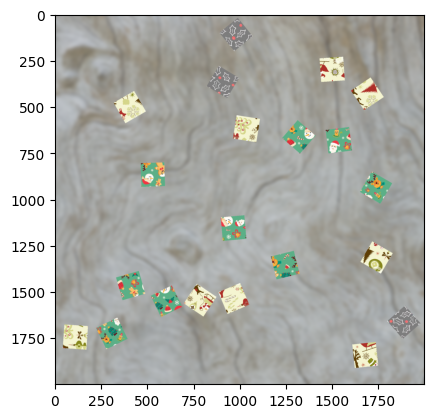

In [262]:
#plot image
im = load_input_image(1)
plt.imshow(im)
plt.show()

# END - CRASH ZONE
***

solving  0
Denoising images...
Extracting features...
1/1 [==============================] - 0s 56ms/step
PCA...
Clustering...


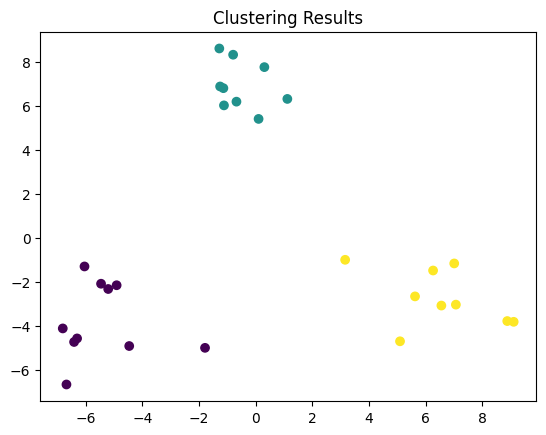

data_project/train_solution_29
solving  1
Denoising images...
Extracting features...
1/1 [==============================] - 0s 201ms/step
PCA...
Clustering...


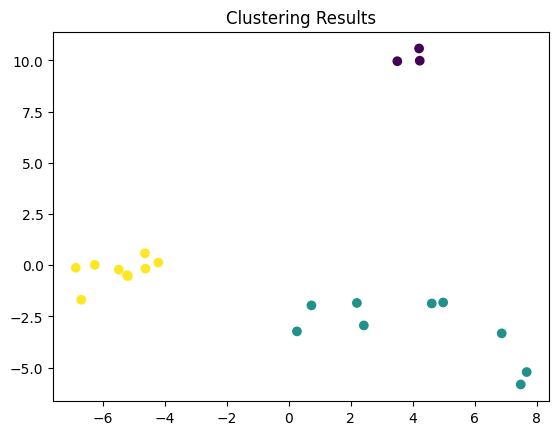

data_project/train_solution_29
solving  2
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


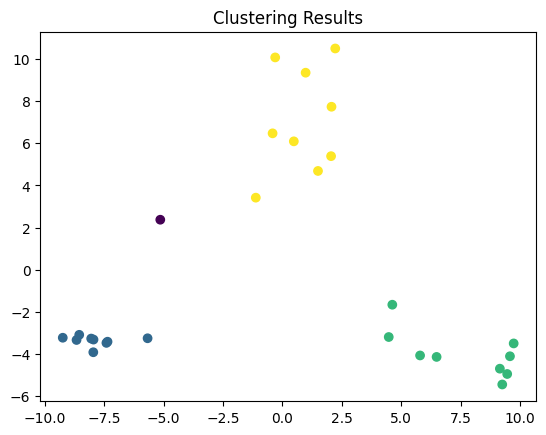

data_project/train_solution_29
solving  3
Denoising images...
Extracting features...
1/1 [==============================] - 0s 68ms/step
PCA...
Clustering...


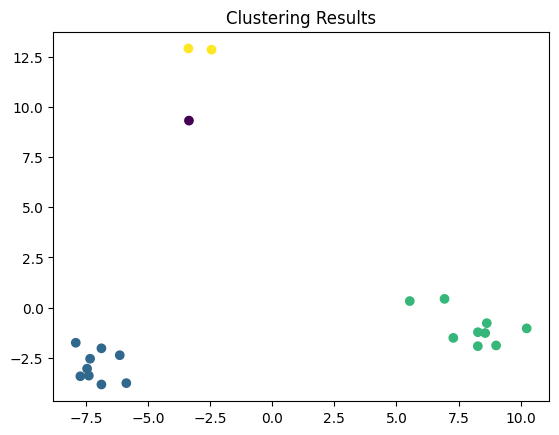

data_project/train_solution_29
solving  4
Denoising images...
Extracting features...
1/1 [==============================] - 0s 61ms/step
PCA...
Clustering...


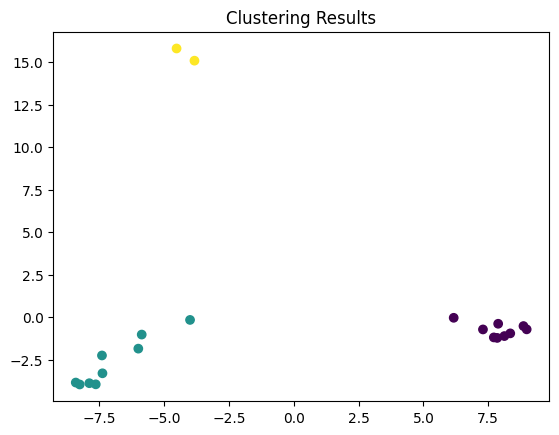

data_project/train_solution_29
solving  5
Denoising images...
Extracting features...
1/1 [==============================] - 0s 62ms/step
PCA...
Clustering...


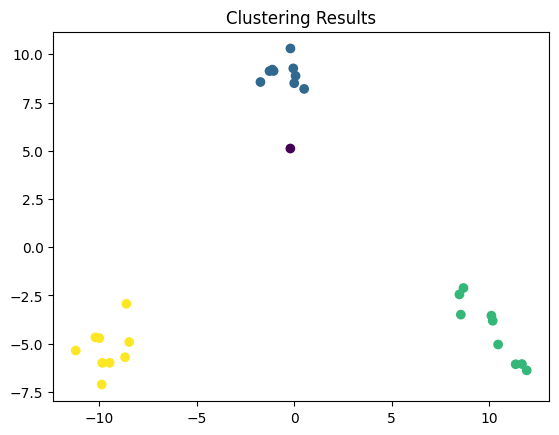

data_project/train_solution_29
solving  6
Denoising images...
Extracting features...
1/1 [==============================] - 0s 61ms/step
PCA...
Clustering...


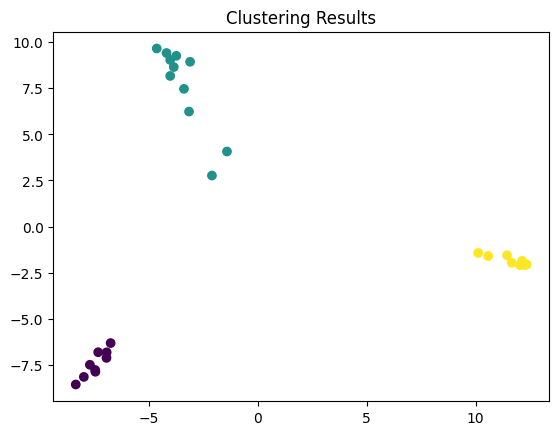

data_project/train_solution_29
solving  7
Denoising images...
Extracting features...
1/1 [==============================] - 0s 58ms/step
PCA...
Clustering...


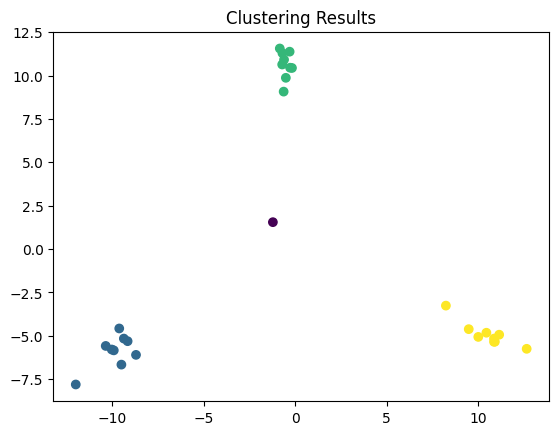

data_project/train_solution_29
solving  8
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


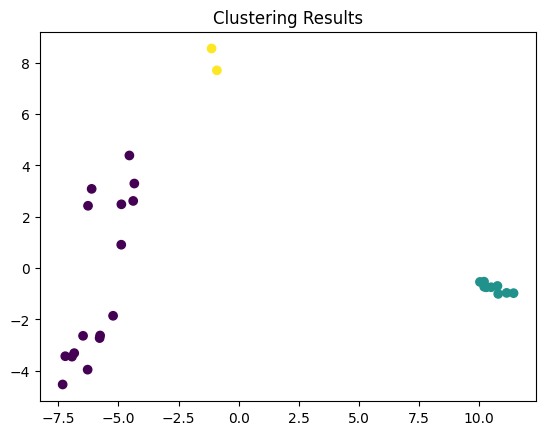

data_project/train_solution_29
solving  9
Denoising images...
Extracting features...
1/1 [==============================] - 0s 73ms/step
PCA...
Clustering...


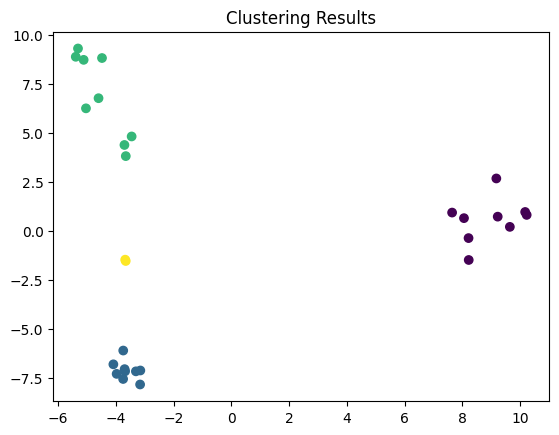

data_project/train_solution_29
solving  10
Denoising images...
Extracting features...
1/1 [==============================] - 0s 65ms/step
PCA...
Clustering...


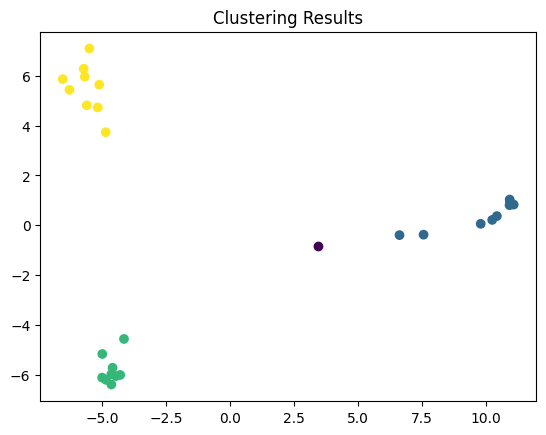

data_project/train_solution_29
solving  11
Denoising images...
Extracting features...
1/1 [==============================] - 0s 68ms/step
PCA...
Clustering...


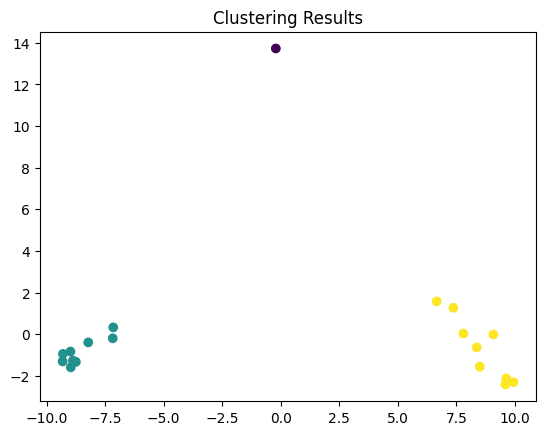

data_project/train_solution_29


In [261]:
group_id = 29
# Evaluate all images
games_id = [0,1,2,3,4,5,6,7,8,9,10,11]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    image_loaded , solved_puzzles , outlier_images = solve_and_export_puzzles_image(i , group_id = group_id)
    
  


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$
